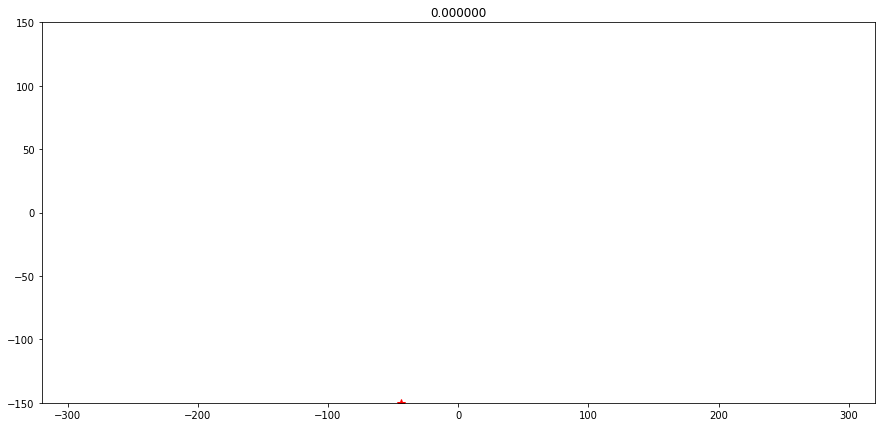

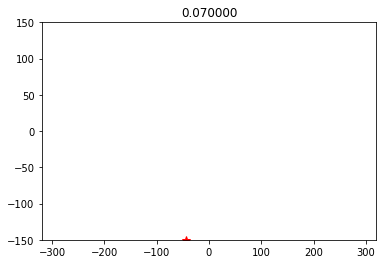

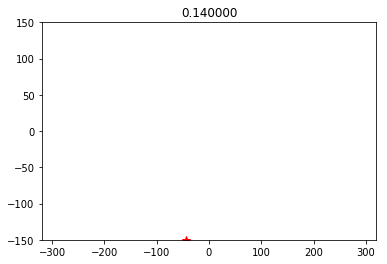

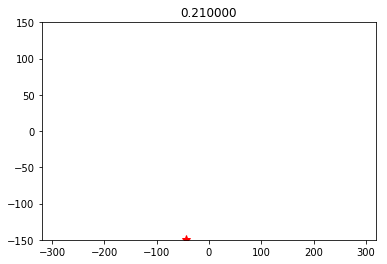

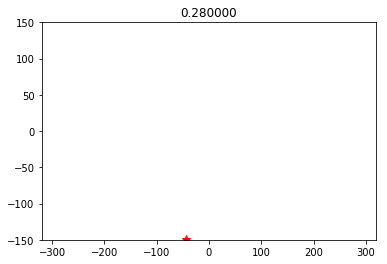

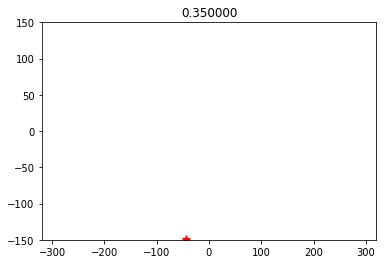

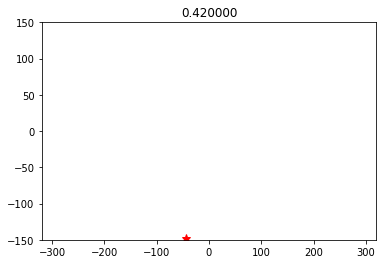

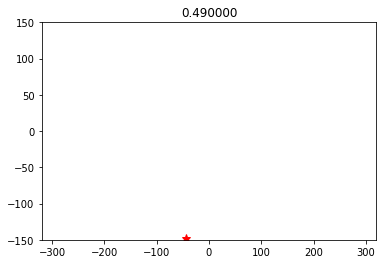

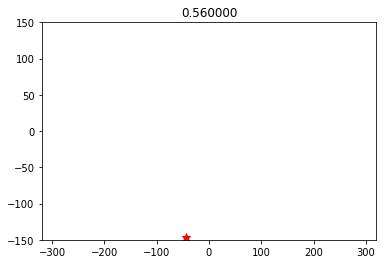

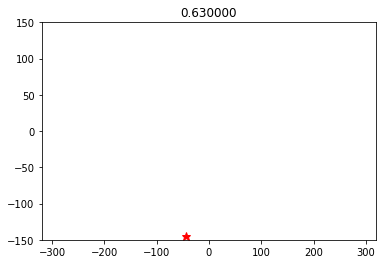

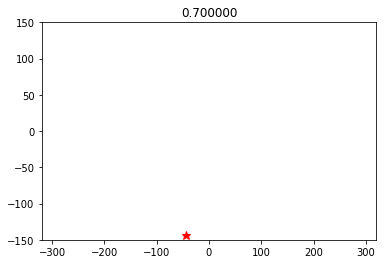

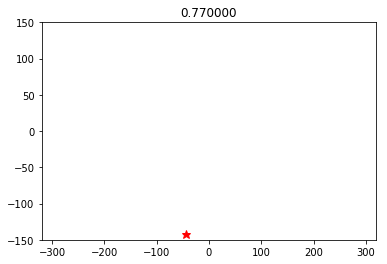

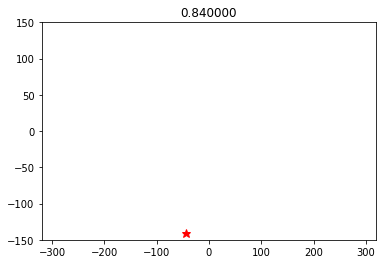

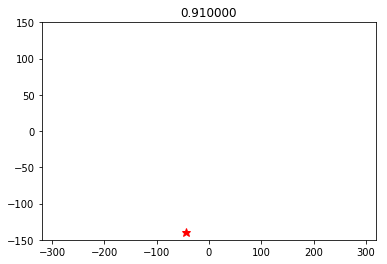

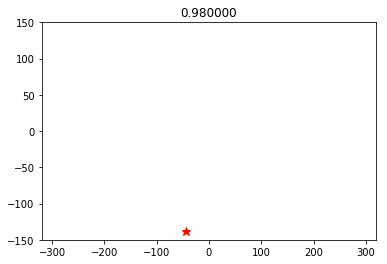

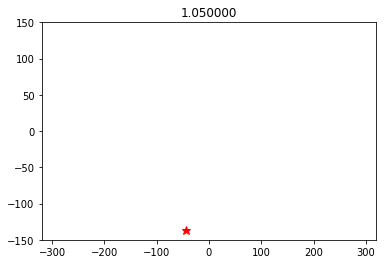

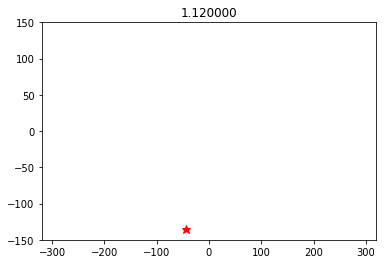

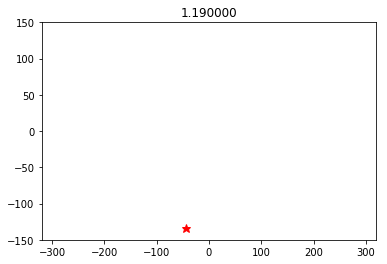

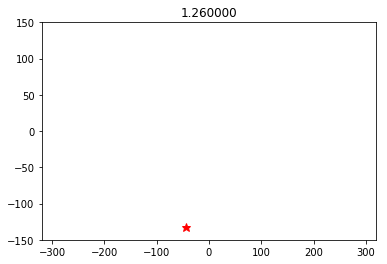

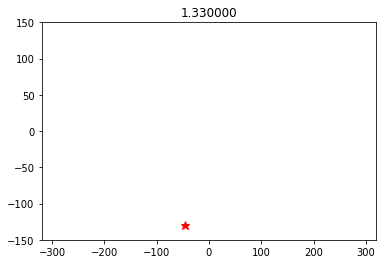

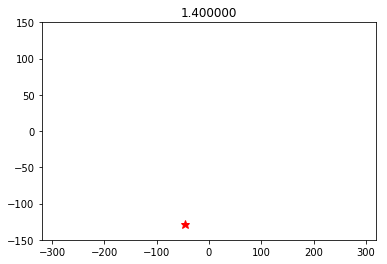

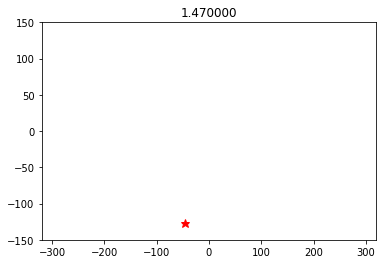

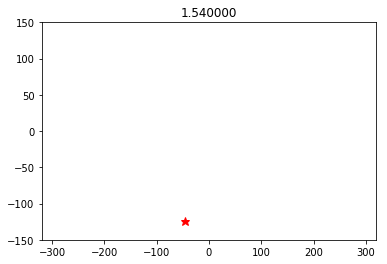

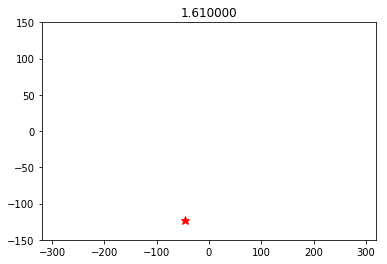

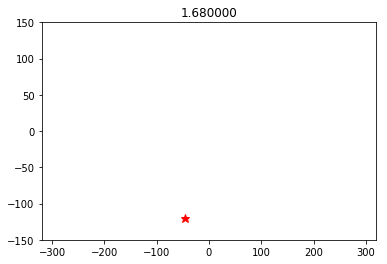

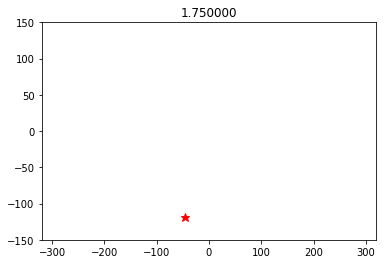

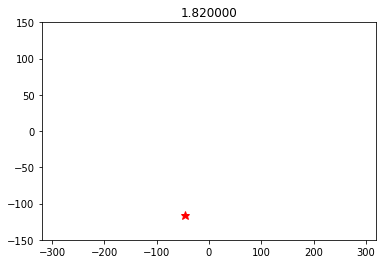

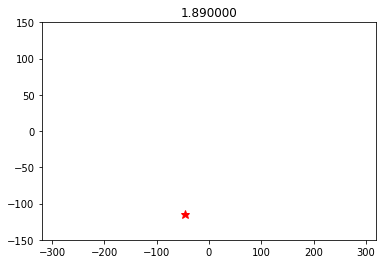

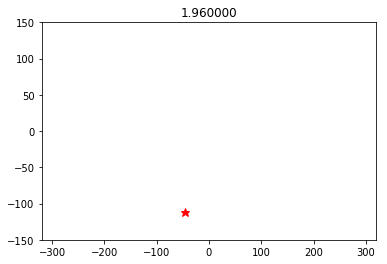

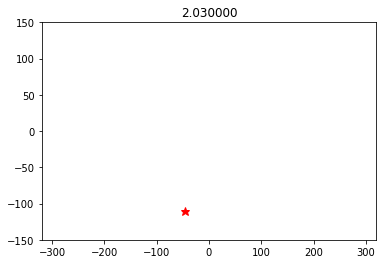

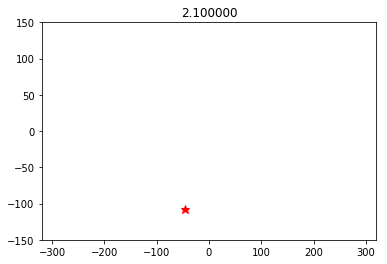

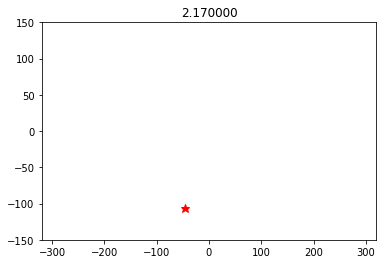

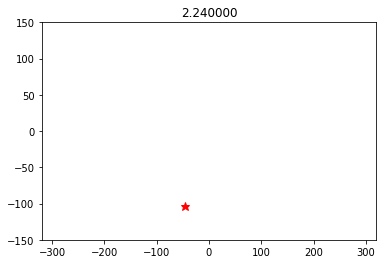

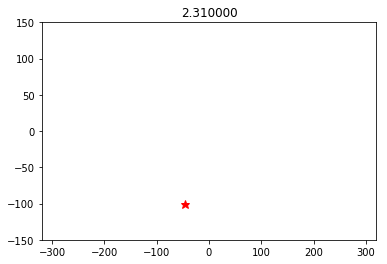

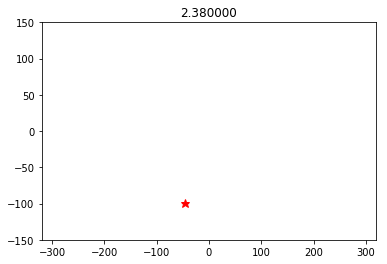

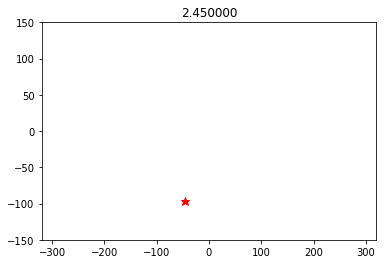

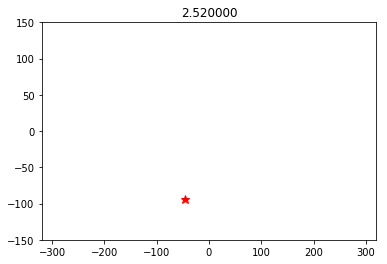

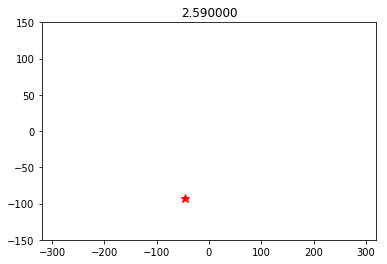

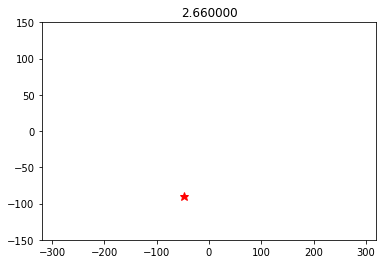

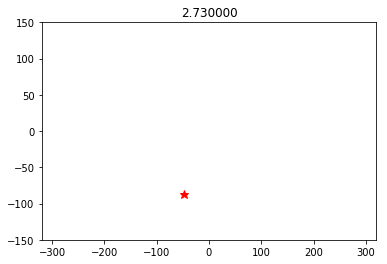

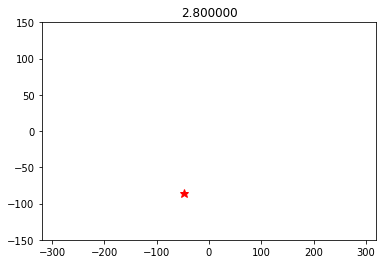

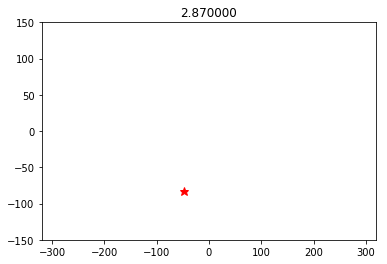

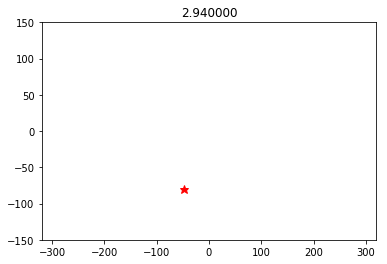

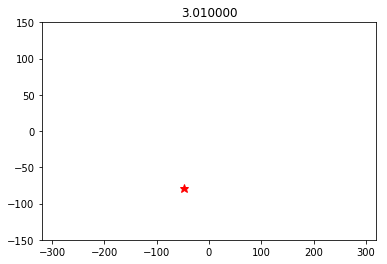

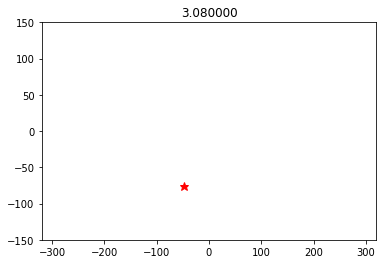

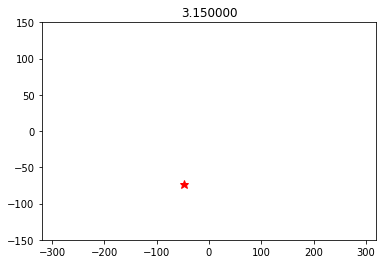

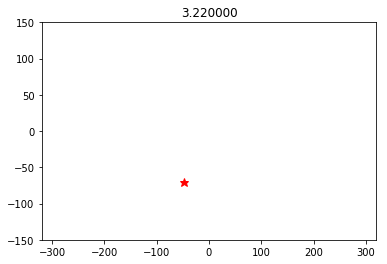

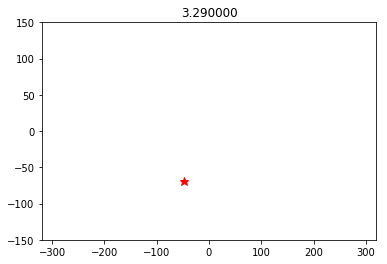

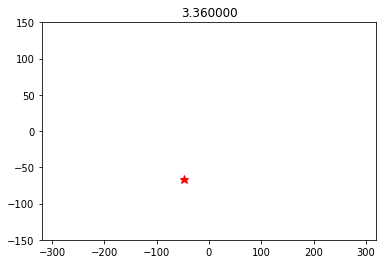

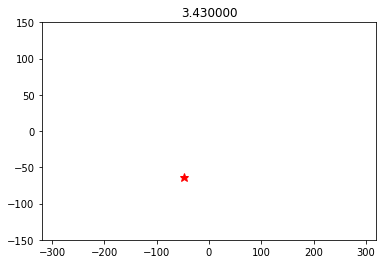

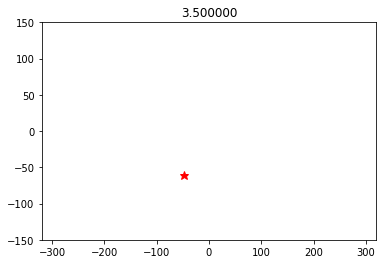

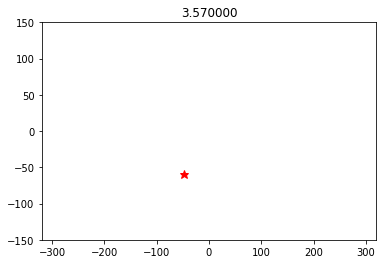

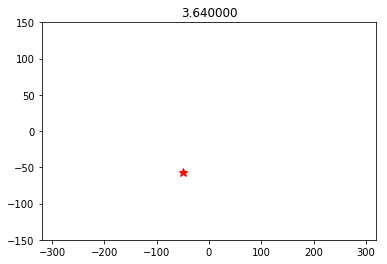

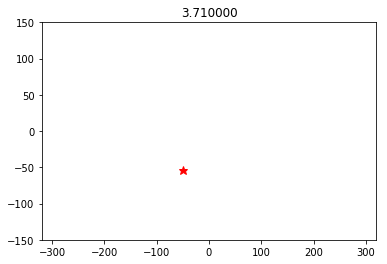

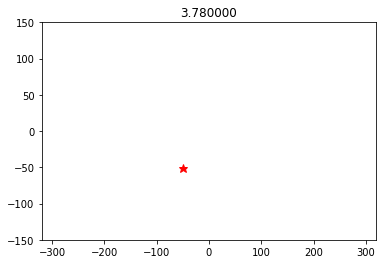

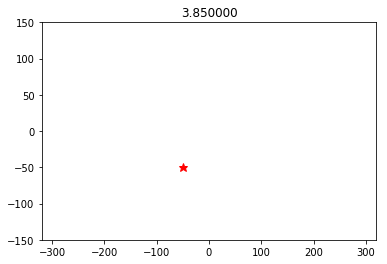

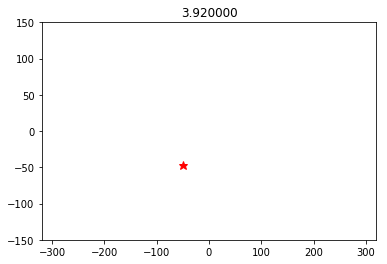

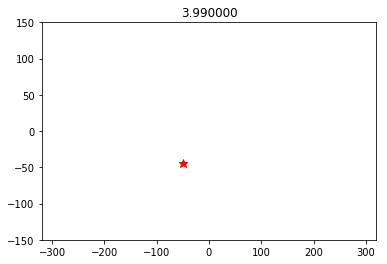

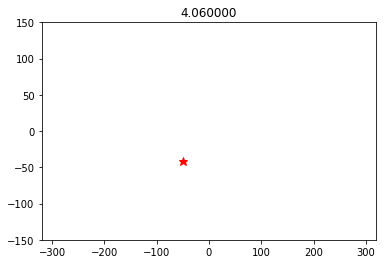

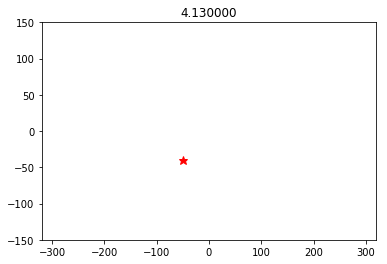

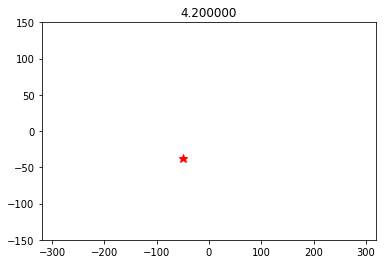

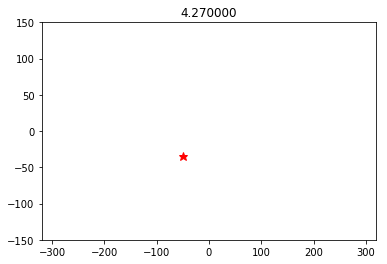

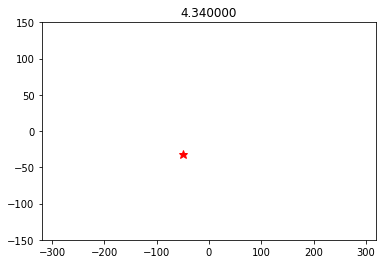

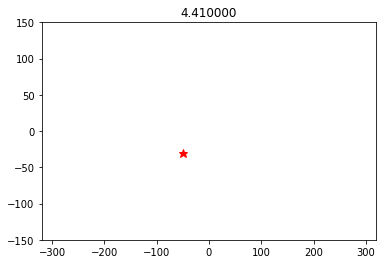

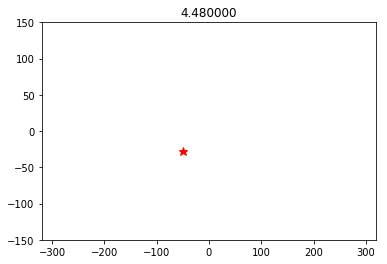

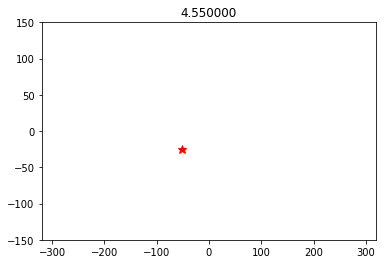

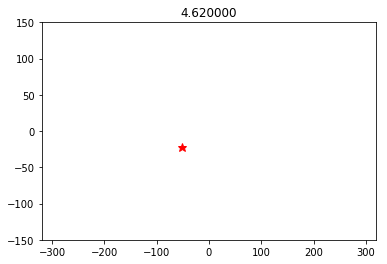

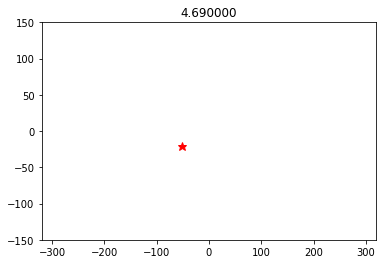

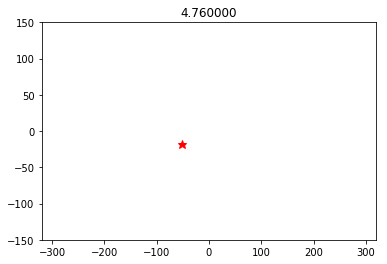

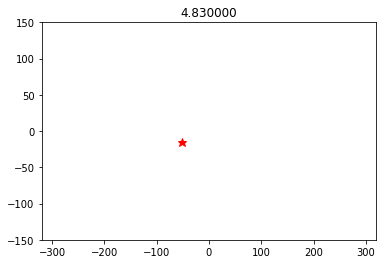

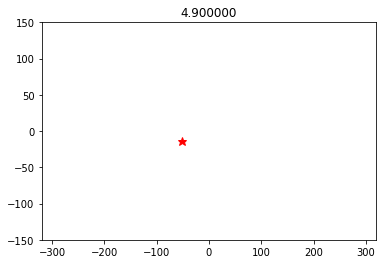

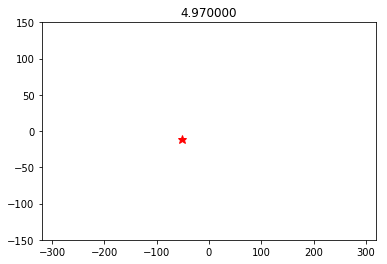

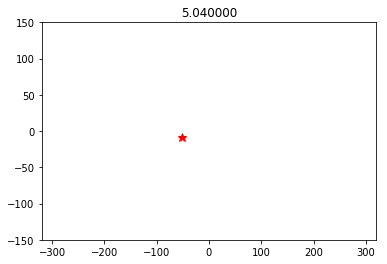

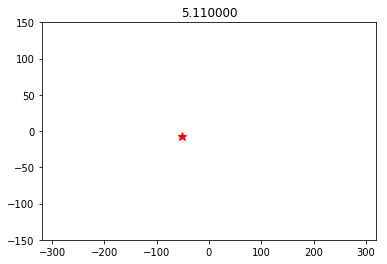

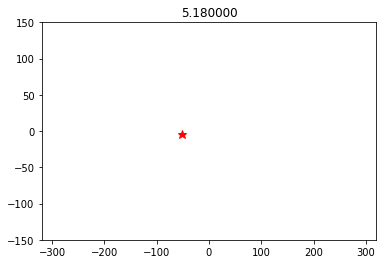

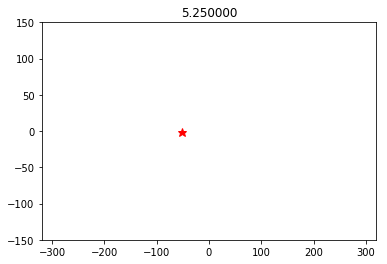

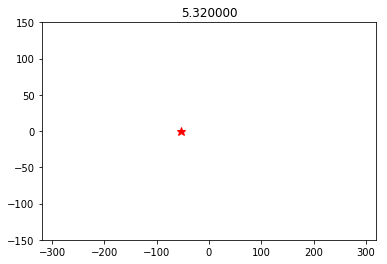

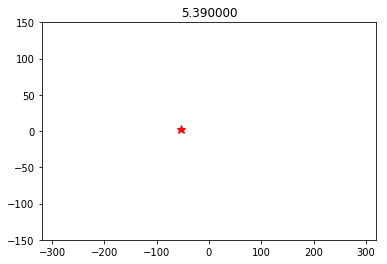

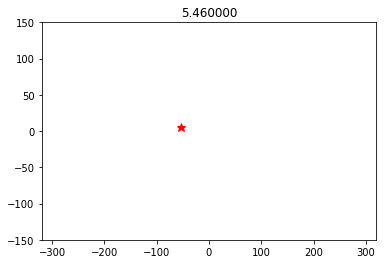

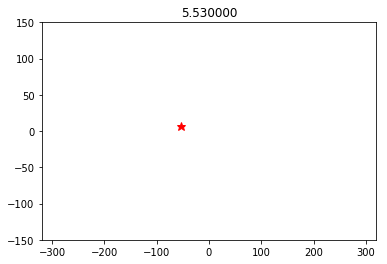

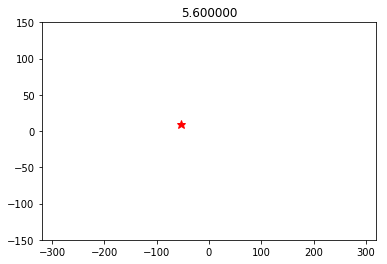

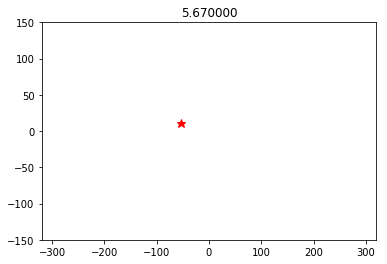

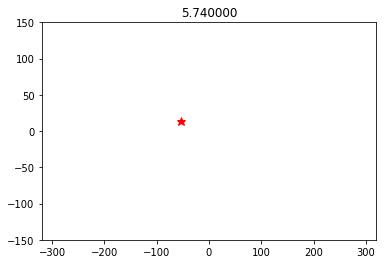

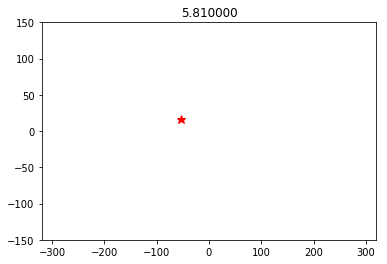

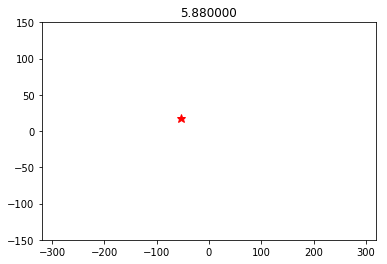

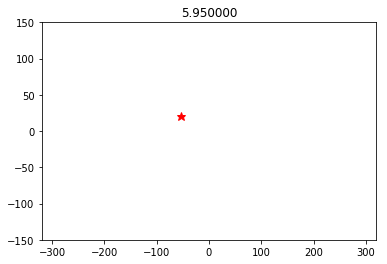

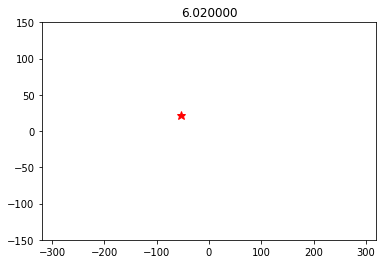

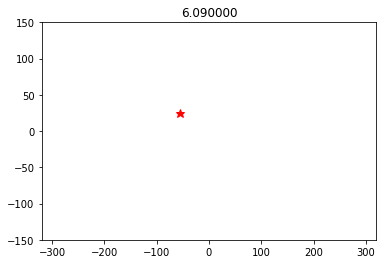

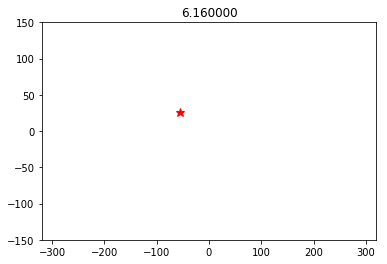

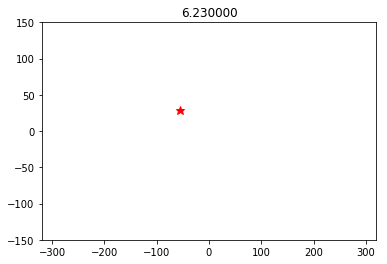

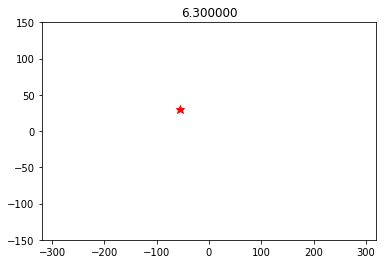

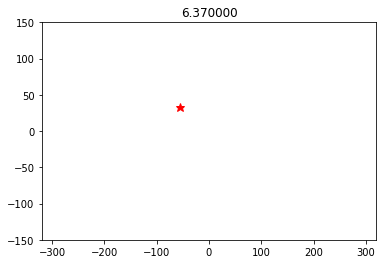

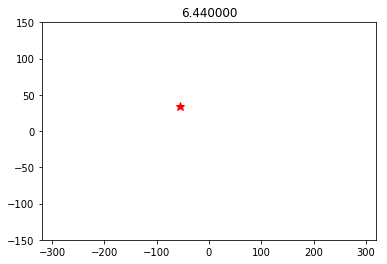

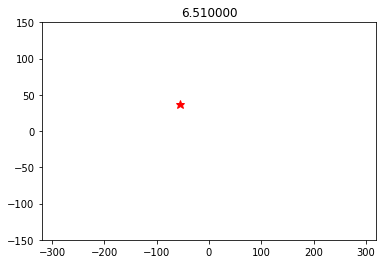

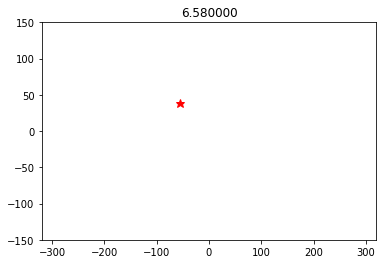

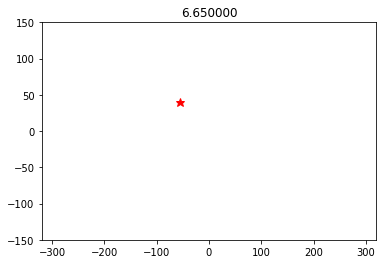

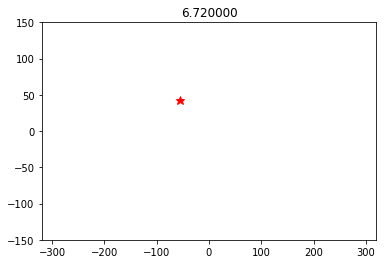

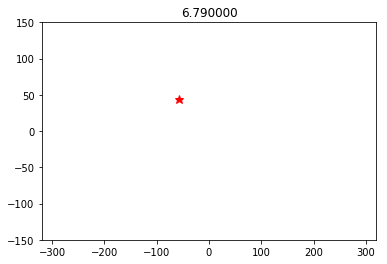

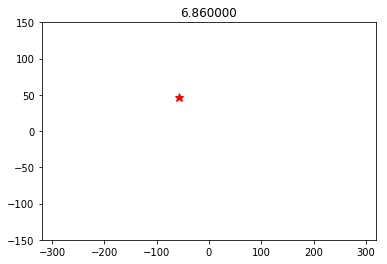

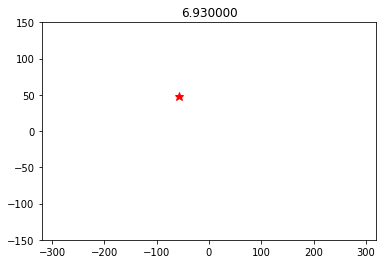

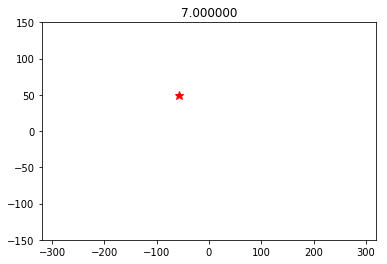

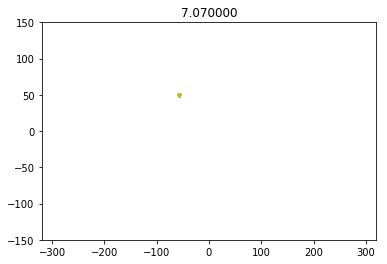

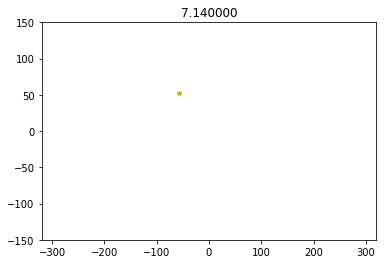

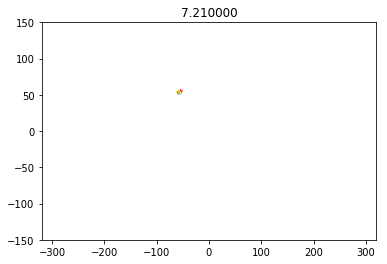

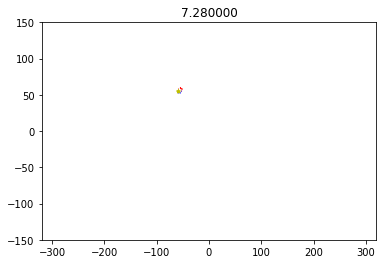

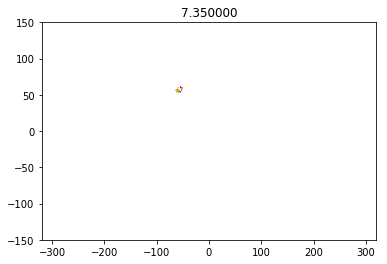

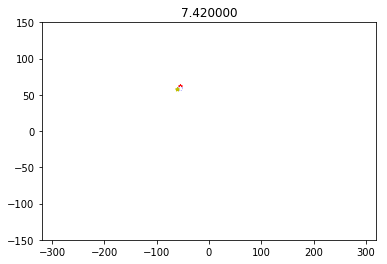

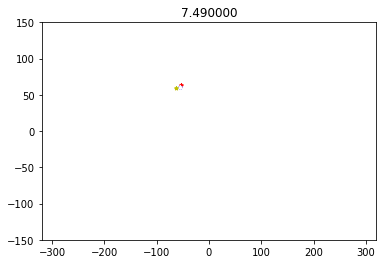

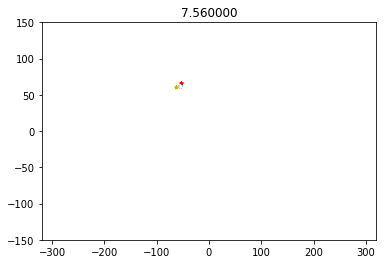

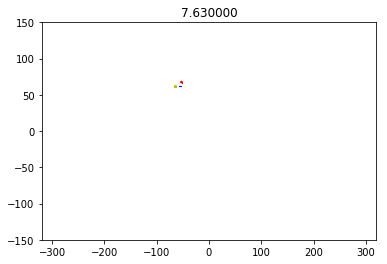

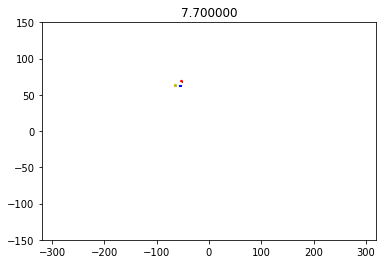

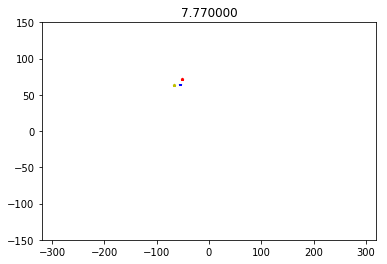

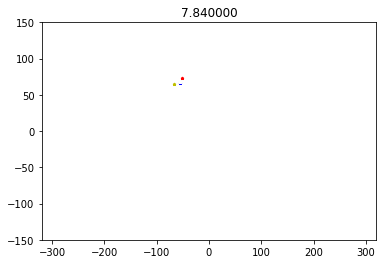

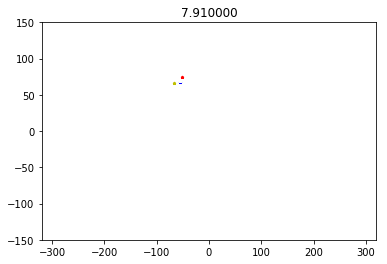

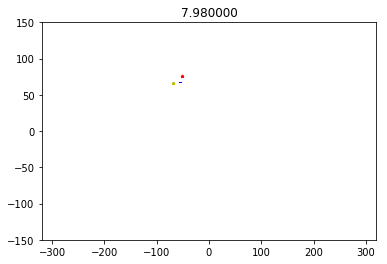

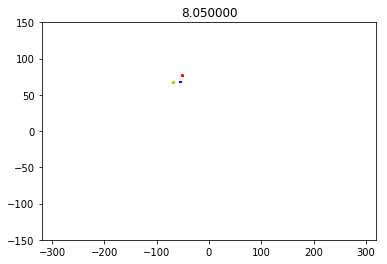

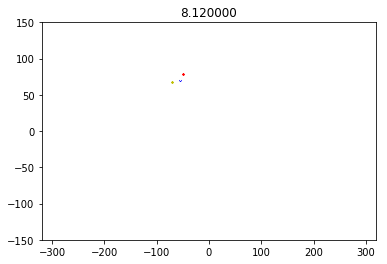

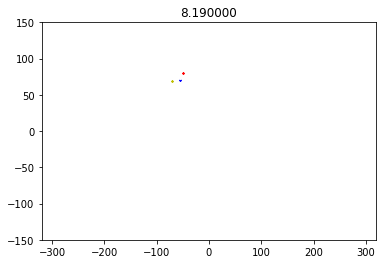

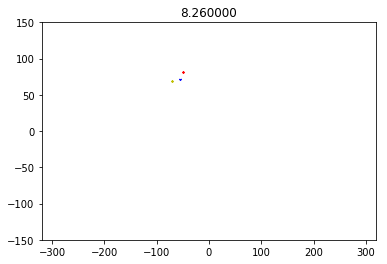

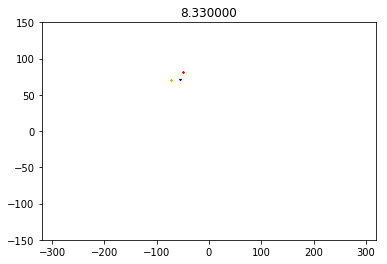

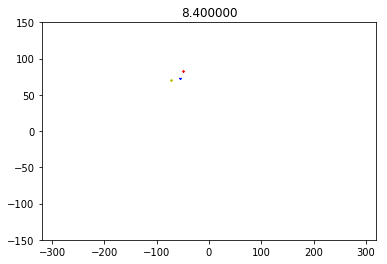

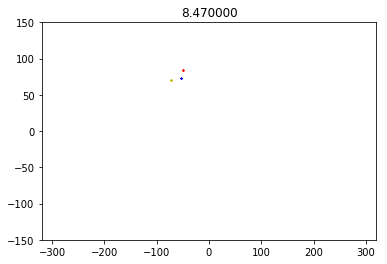

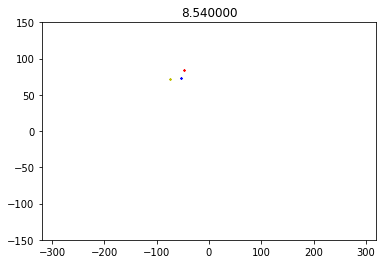

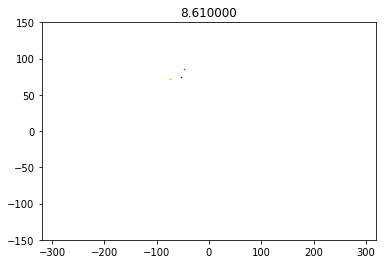

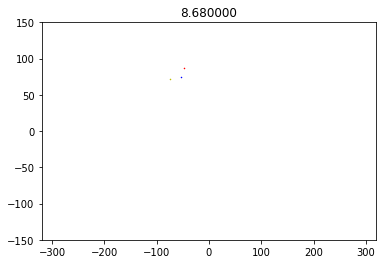

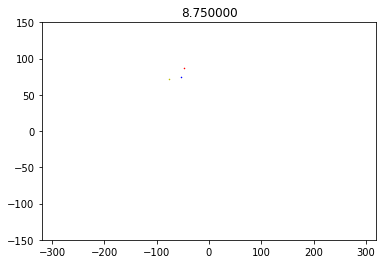

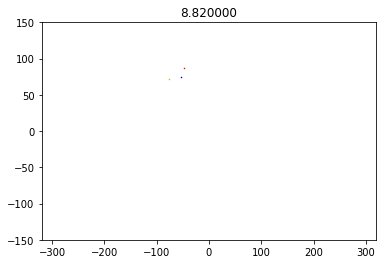

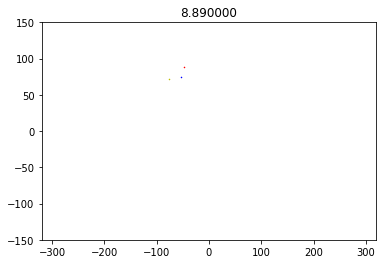

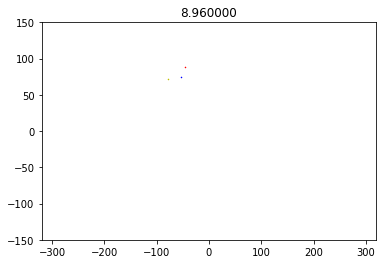

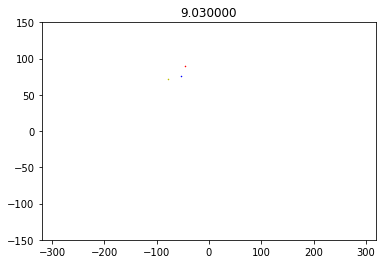

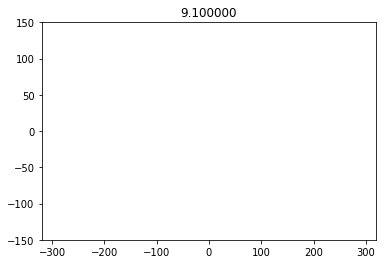

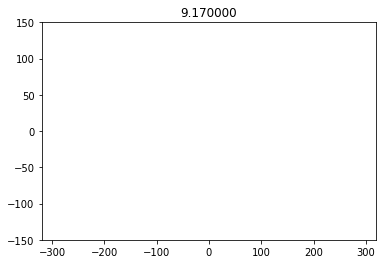

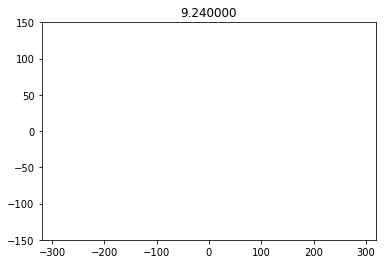

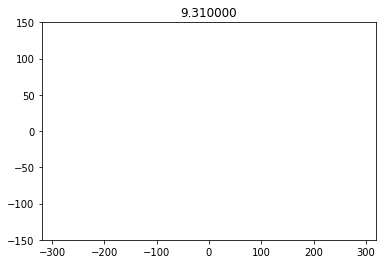

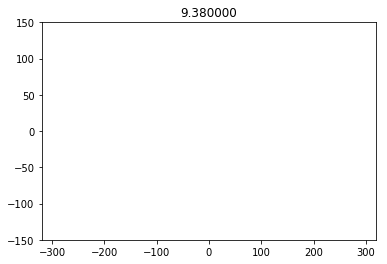

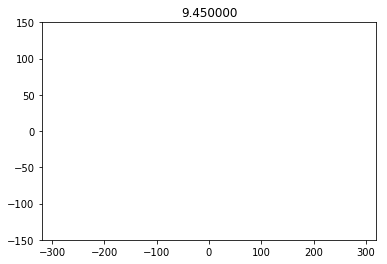

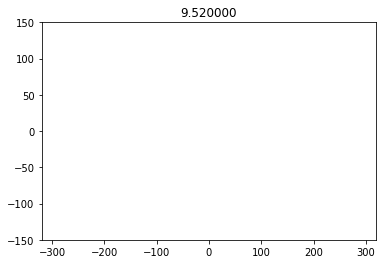

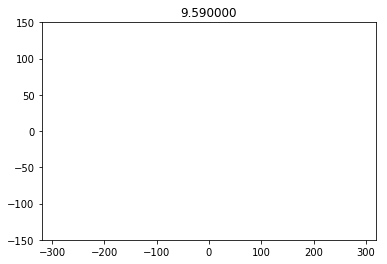

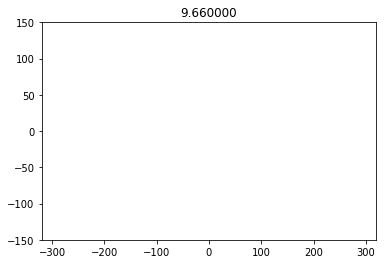

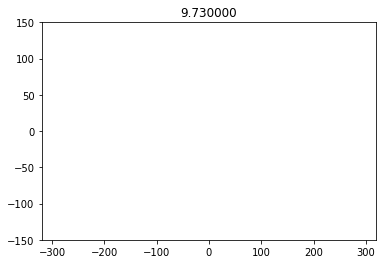

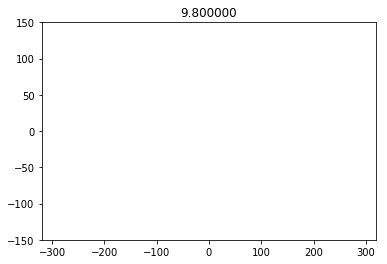

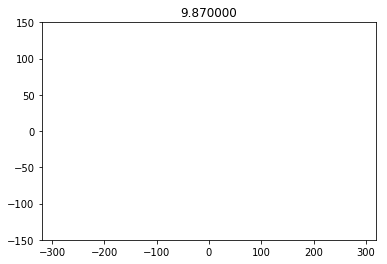

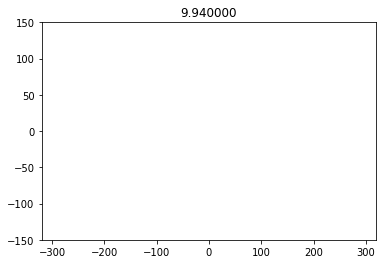

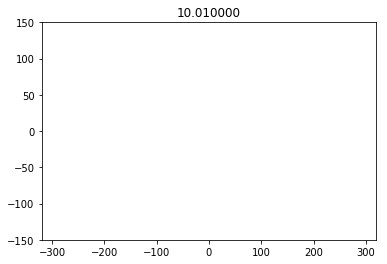

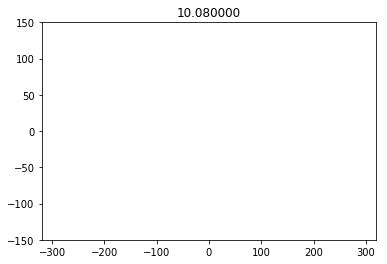

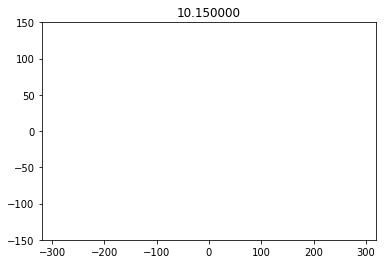

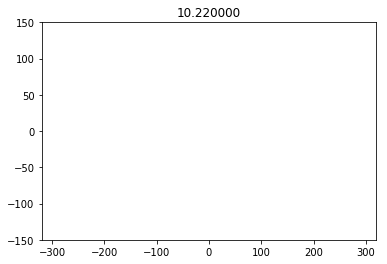

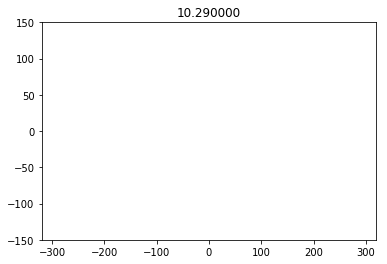

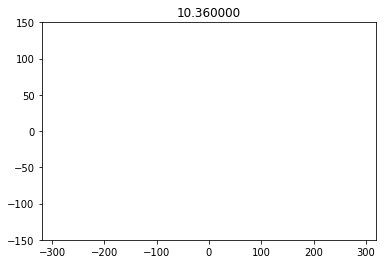

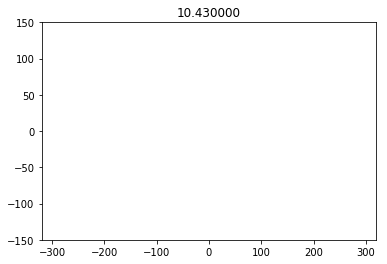

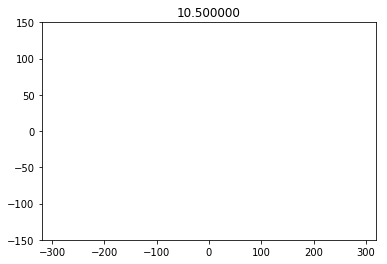

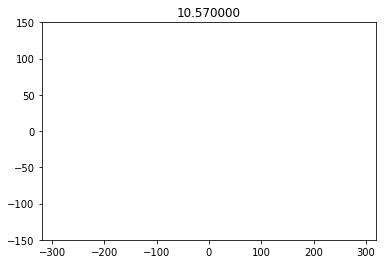

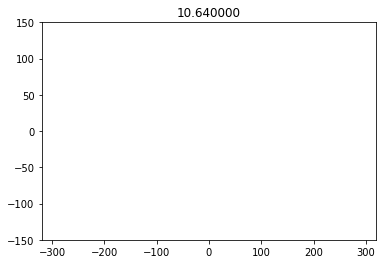

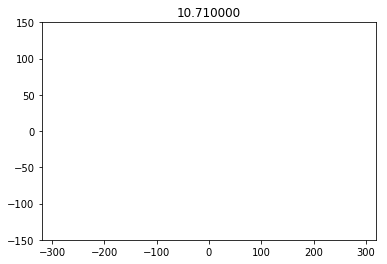

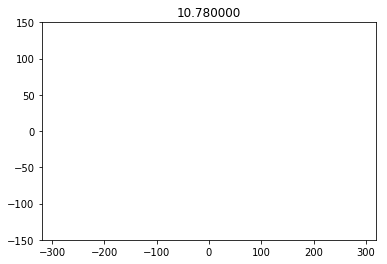

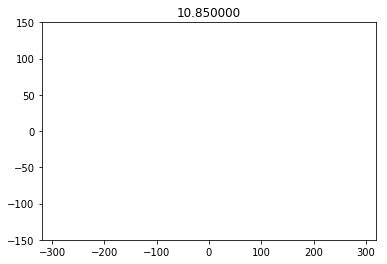

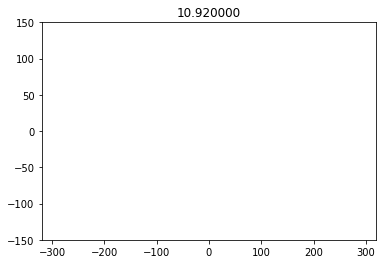

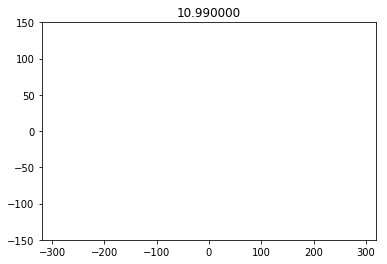

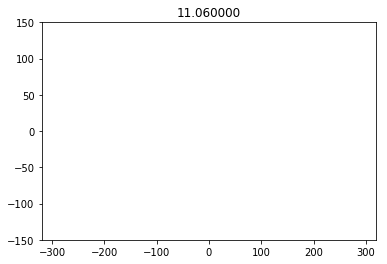

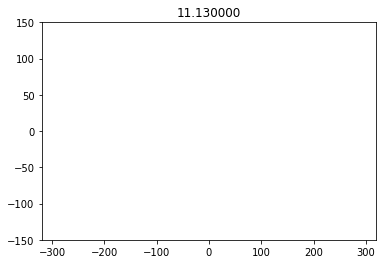

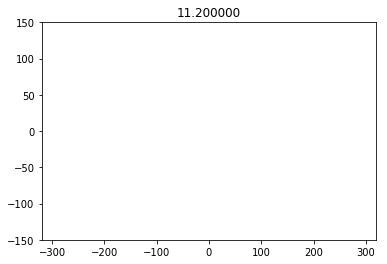

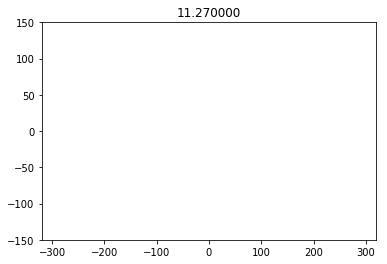

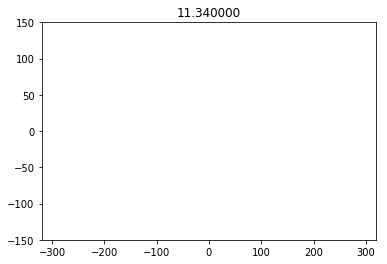

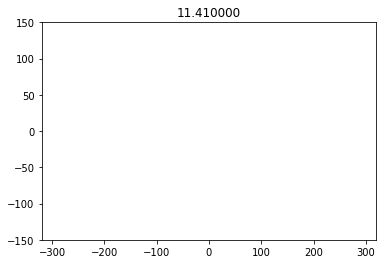

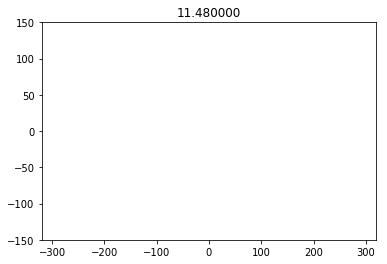

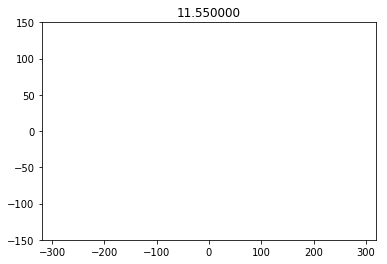

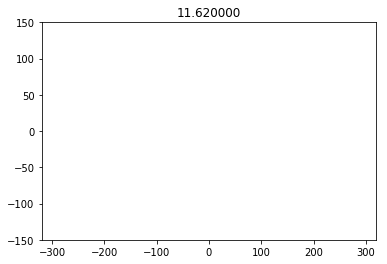

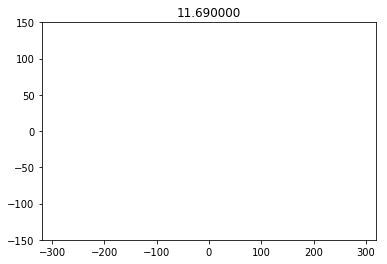

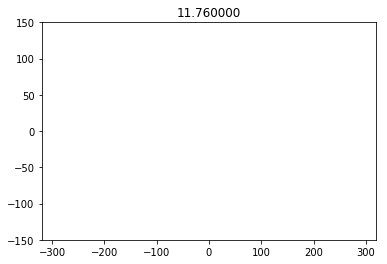

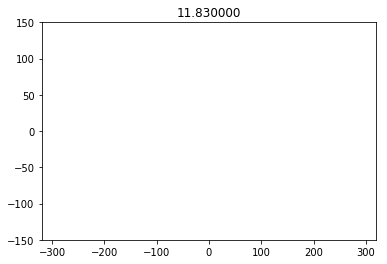

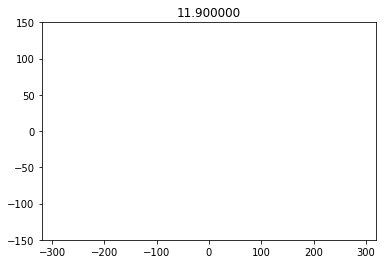

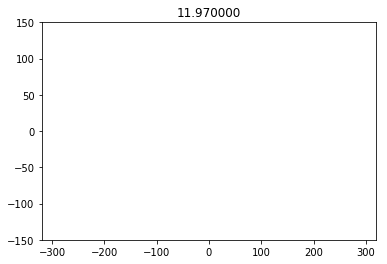

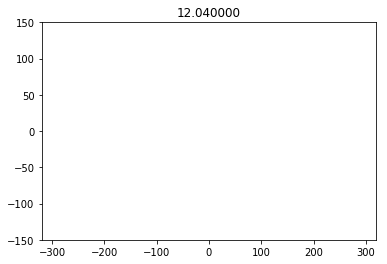

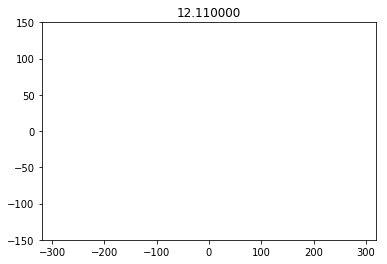

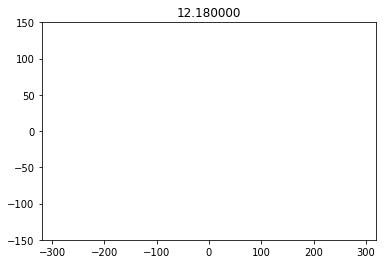

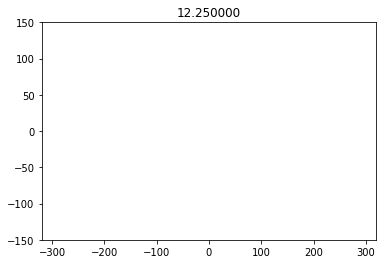

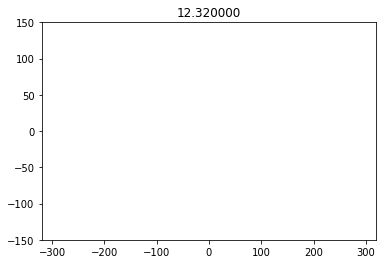

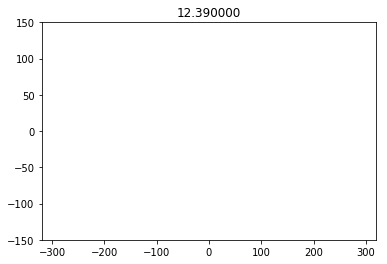

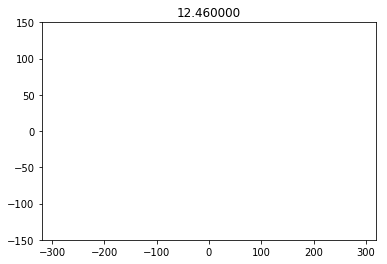

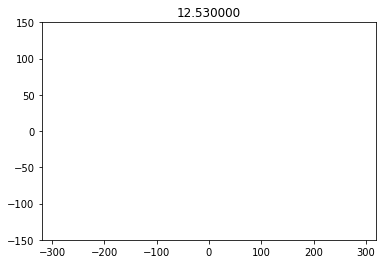

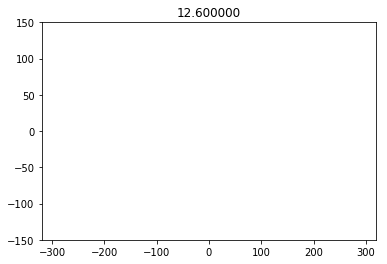

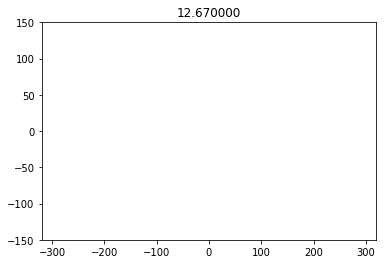

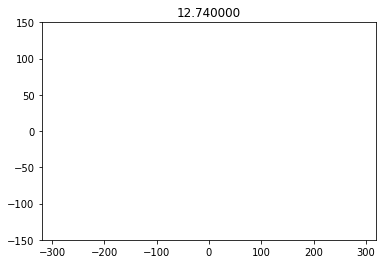

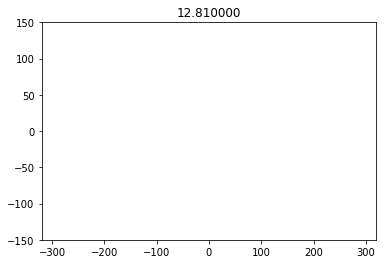

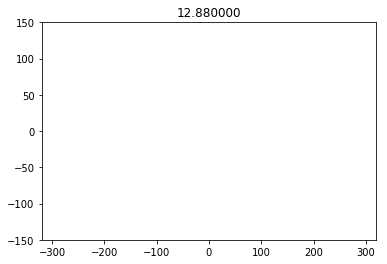

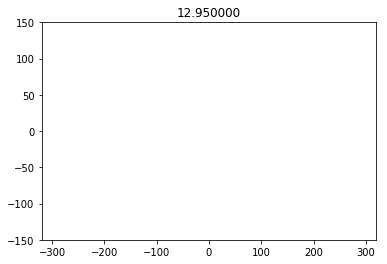

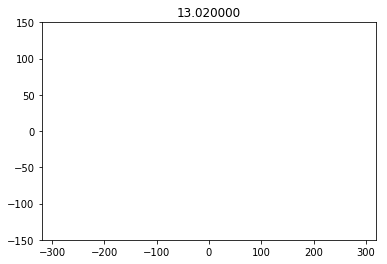

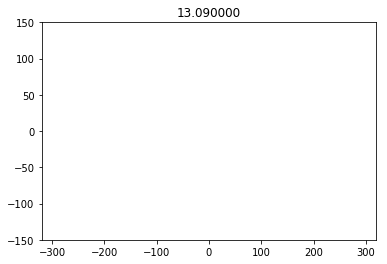

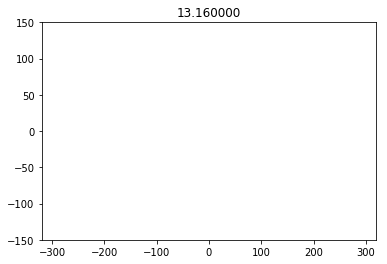

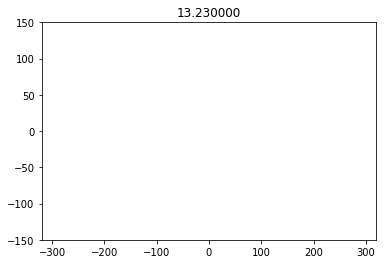

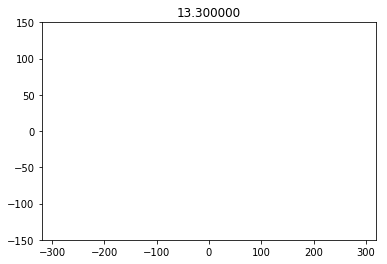

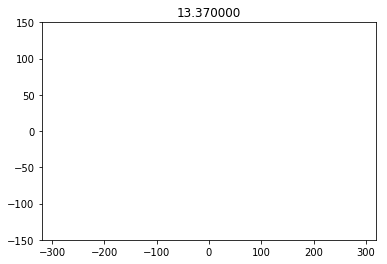

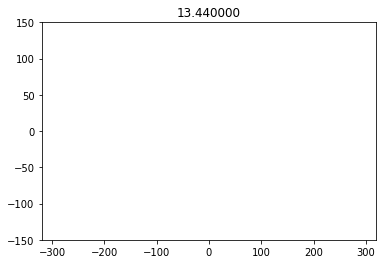

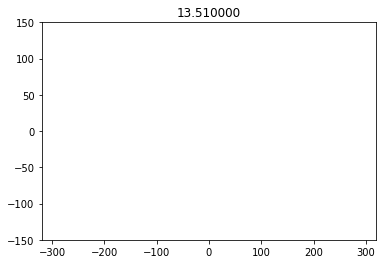

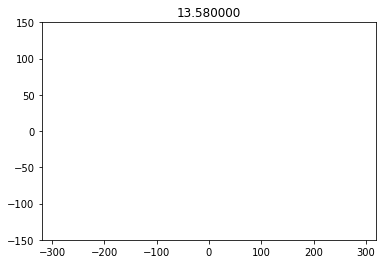

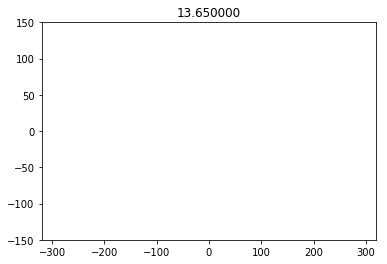

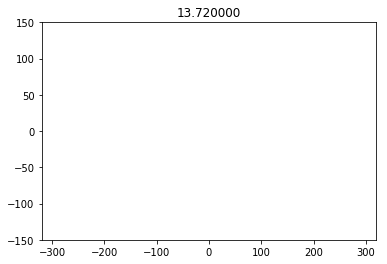

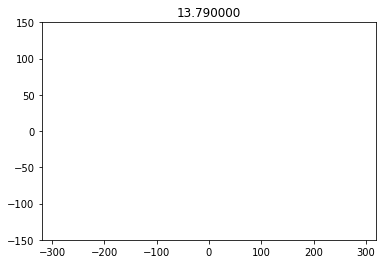

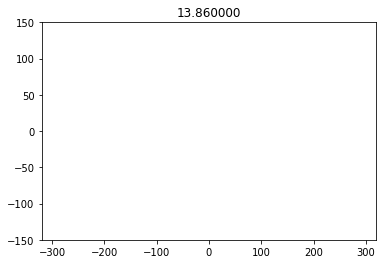

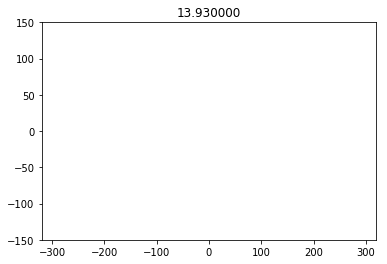

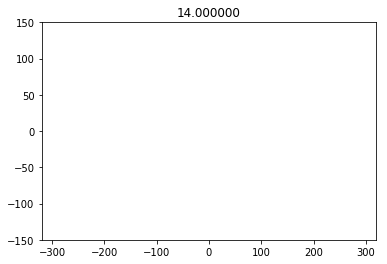

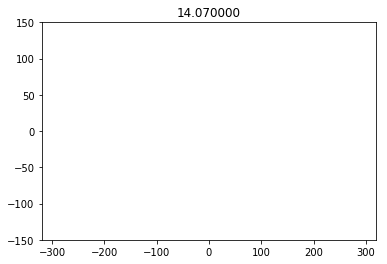

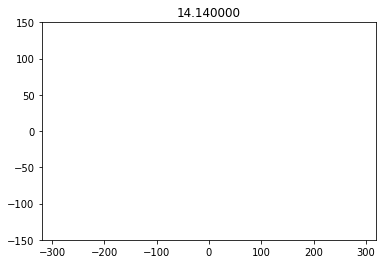

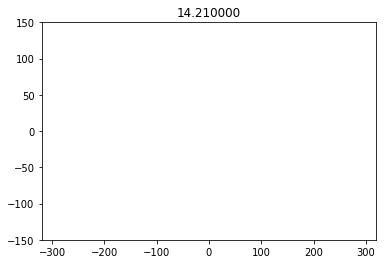

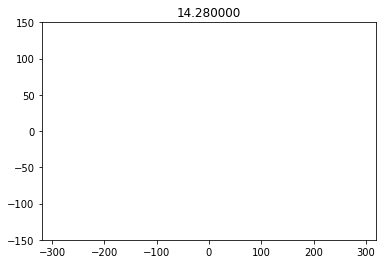

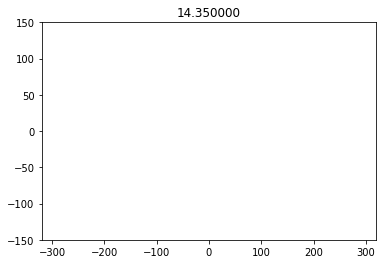

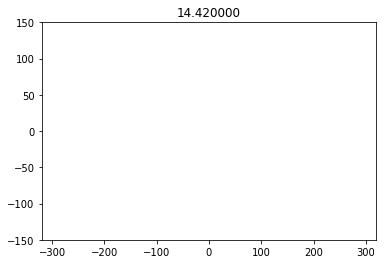

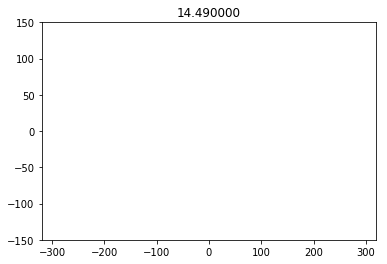

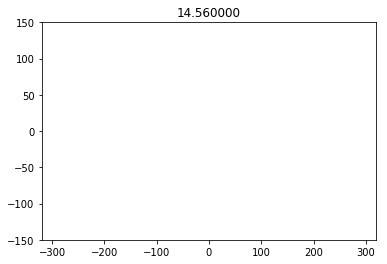

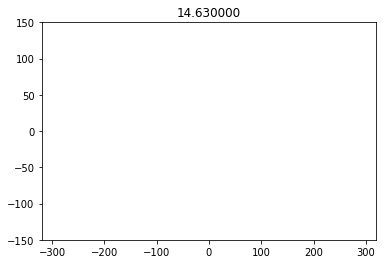

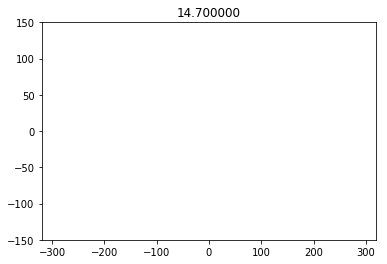

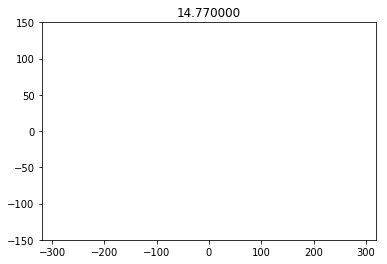

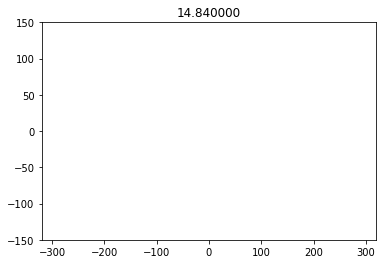

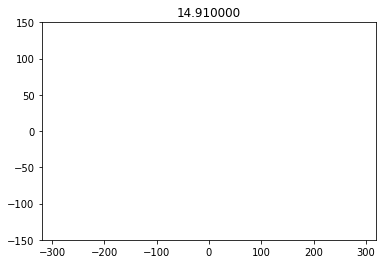

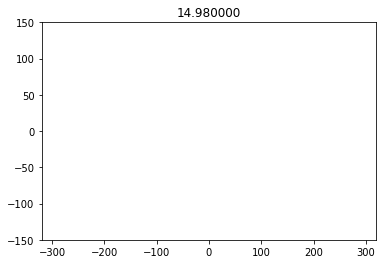

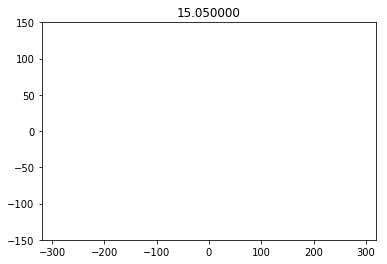

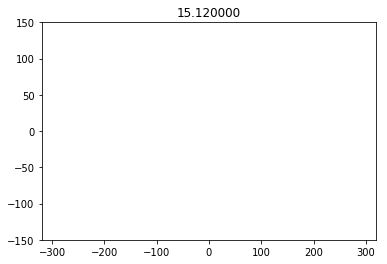

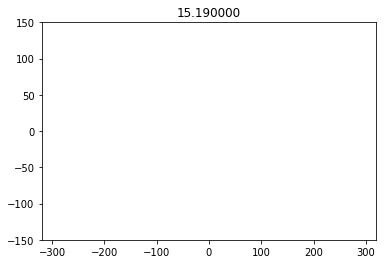

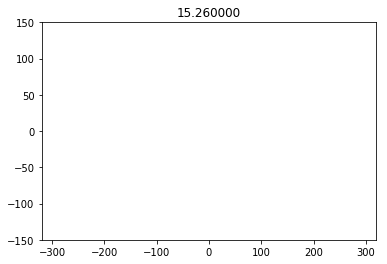

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import numpy.random as random


g = 9.8


def set_plot_size(sandbox):

    max_w = 15
    max_h = 7

    h, w = 0, 0
    if sandbox[0]/max_w > sandbox[1]/max_h:
        w = max_w
        h = sandbox[1] / sandbox[0] * w
    else:
        h = max_h
        w = sandbox[0] / sandbox[1] * h

    plt.figure(figsize=(w, h))


class Firework:

    def __init__(self,
                 num_splinters=10,
                 angle=0.0,
                 start_x=0.0,
                 start_y=0.0,
                 thrust_function=(lambda t: 20.0),
                 lifetime=5.0):

        self.num_splinters = num_splinters

        self.v = np.array([0.0, 0.0])
        self.r = np.array([start_x, start_y])
        self.angle = angle

        self.thrust_function = thrust_function
        self.lifetime = lifetime

        self.dead = False

    def update(self, t, dt):

        if self.lifetime <= 0:
            self.dead = True

        if self.dead:
            return False

        thrust = self.thrust_function(t)
        a = np.array([thrust*np.sin(self.angle), thrust*np.cos(self.angle) - g])

        self.r += self.v*dt
        self.v += a*dt
        self.lifetime -= dt

        return True

    def draw(self):
        if not self.dead:
            size = 9
            plt.plot(self.r[0], self.r[1], 'r*', markersize=size)


class Splinter:

    def __init__(self,
                 start_r,
                 start_v,
                 lifetime=5.0,
                 friction_damping_function=(lambda v: np.array([0.0, 0.0]))):

        self.r = start_r
        self.v = start_v
        self.damping_function = friction_damping_function
        self.lifetime = lifetime
        self.max_lifetime = lifetime
        self.color = 'bgrcmykw'[random.randint(8)]

        self.dead = False

    def update(self, t, dt):

        if self.lifetime <= 0:
            self.dead = True

        if self.dead:
            return False

        a = self.damping_function(self.v) + np.array([0.0, -g])

        self.r += self.v*dt
        self.v += a*dt
        self.lifetime -= dt

        return True

    def draw(self):
        if not self.dead:
            initial_marker_size = 6
            marker_size = int(initial_marker_size*self.lifetime/self.max_lifetime) - 1
            plt.plot(self.r[0], self.r[1], color=self.color, marker='*', markersize=marker_size)


if __name__ == "__main__":

    sandbox = (640.0, 300.0)
    steps_count = 1000
    dt = 0.07

    set_plot_size(sandbox)

    firework_num_splinters = 4
    firework_start_angle = random.uniform(-0.1, 0.1)
    firework_start_x = random.uniform(-sandbox[0]/5, sandbox[0]/5)
    firework_start_y = -sandbox[1]/2
    firework_thrust_function = lambda t: 45.0/(1.0 + t)
    firework_lifetime = 7.0

    splinter_speed = 12.0
    splinter_lifetime = 3.0
    splinter_damping = lambda v: -0.3*v

    splinters = []
    firework = Firework(num_splinters=firework_num_splinters,
                        angle=firework_start_angle,
                        start_x=firework_start_x,
                        start_y=firework_start_y,
                        thrust_function=firework_thrust_function,
                        lifetime=firework_lifetime)

    for step in range(steps_count):

        time = dt*step

        plt.title("{:f}".format(time))
        plt.axis([-sandbox[0]/2, sandbox[0]/2, -sandbox[1]/2, sandbox[1]/2])

        firework.draw()
        for splinter in splinters:
            splinter.draw()

        for splinter in splinters:
            splinter.update(time, dt)

        plt.pause(0.001)
        plt.clf()

        if not firework.update(time, dt):
            if not splinters:
                for i in range(firework.num_splinters):
                    angle = random.uniform(0, 2*np.pi)
                    speed = random.uniform(splinter_speed/4, splinter_speed*7/4)
                    r = firework.r
                    v = firework.v + np.array([speed*np.cos(angle), speed*np.sin(angle)])
                    splinters.append(Splinter(r.copy(), v.copy(),
                                              lifetime=splinter_lifetime,
                                              friction_damping_function=splinter_damping))

    plt.show()